Zadanie 1

In [32]:
def prostokatow(function, a, b, i):
    dx = (b - a) / i
    integr = 0
    for x in range(i):
        x = x * dx + a
        integr += dx * eval(function)
    return integr
integral = prostokatow('x**2', 0.0, 1.0, 100)
integral

0.32835000000000014

In [33]:
def simpson(my_func, a, b, n):
  delta_x = (b-a)/n
  total = 0  
  for i in range(0, n, 2):
    x = a + delta_x * 2 * i
    total += delta_x * (my_func(x) + 4 * my_func(x + delta_x) + my_func(x + 2 * delta_x)) / 3
  return total

integral = simpson(lambda x: x**2, 0.0, 1.0, 100)
integral

1.3133333333333335

In [34]:
def trapezow(function, a, b, i):
    dx = (b - a) / i
    integr = 0
    for x in range(i):
        x = x * dx + a
        fx1 = eval(function)
        x += dx
        fx2 = eval(function)
        integr += 0.5 * dx * (fx1 + fx2)
    return integr

integral = trapezow('x**2', 0.0, 1.0, 100)
integral

0.33335

Zadanie 2

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

# def function(x):
#   return (x - 2) * (x + 1) * (x - 4)

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([0.0, 8.0, 6.0, -0.0, -4.0, 0.0], dtype=float)

model.fit(xs, ys, epochs=500)
print(model.predict([0.0]))


Zadanie 3

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

*przeglądanie danych*

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

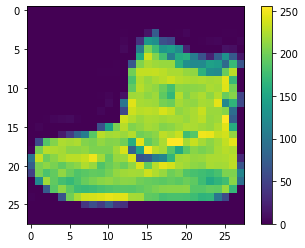

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

*wstępne przetwarzanie danych*

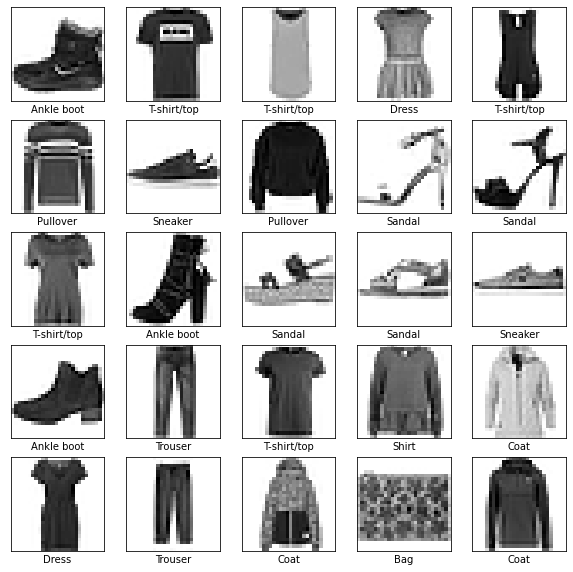

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

*trenowanie modelu*

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 1ms/step - loss: 0.6260 - accuracy: 0.7867
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3851 - accuracy: 0.8590
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3384 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3152 - accuracy: 0.8834
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2926 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2836 - accuracy: 0.8935
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2657 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2584 - accuracy: 0.9056
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2471 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.238

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3529 - accuracy: 0.8775

Test accuracy: 0.8774999976158142


In [15]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([1.1642818e-09, 1.8251959e-13, 1.2250450e-12, 2.0166477e-12,
       1.2937175e-09, 9.4941548e-05, 6.8599766e-09, 3.3125740e-02,
       1.7233499e-10, 9.6677935e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
test_labels[0]

9

In [19]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

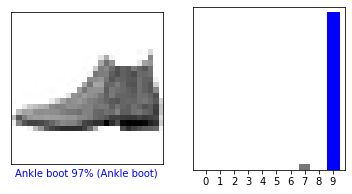

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

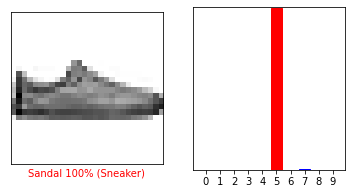

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

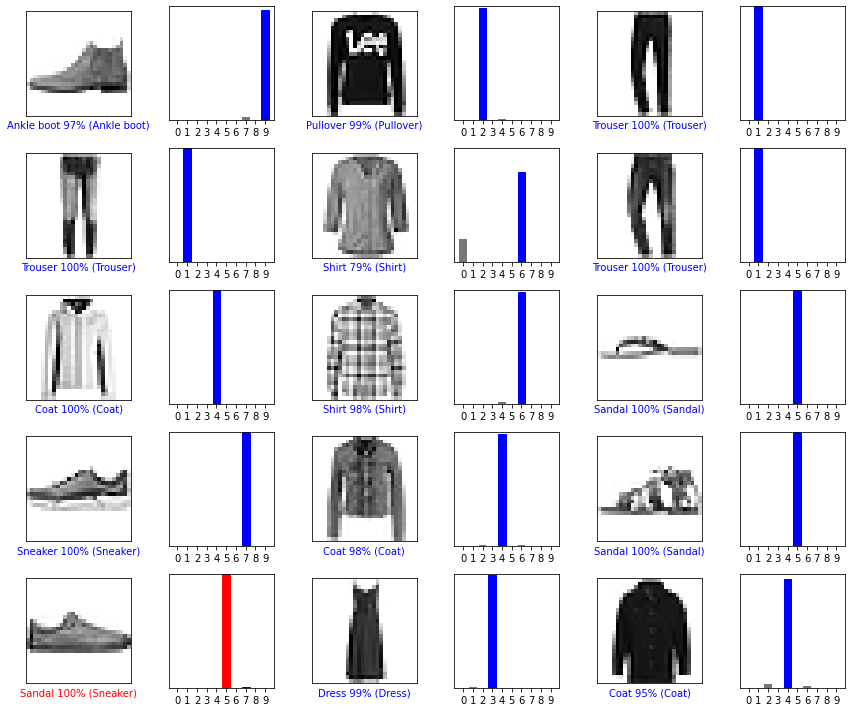

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [25]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[6.5532268e-04 1.8465449e-09 9.8861700e-01 1.5529707e-08 9.5551526e-03
  3.8310696e-13 1.1724244e-03 1.4524621e-15 2.7410620e-09 6.2259981e-10]]


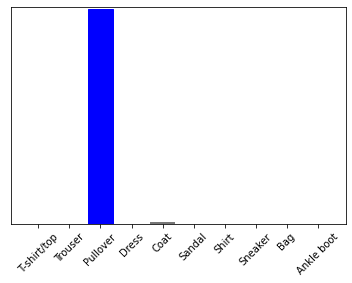

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [29]:
np.argmax(predictions_single[0])

2